## Algorithm training, testing, validation, and experiment tracking

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (16, 12)

### Model training and testing

In [2]:
# import libraries for algorithms traininng, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# training data
train_df = pd.read_csv('../datasets/cleaned/train.csv')
X_train = train_df.drop(['Daily_radiation'], axis = 1)
y_train = train_df['Daily_radiation']

# test data
test_df = pd.read_csv('../datasets/cleaned/test.csv')
X_test = test_df.drop(['Daily_radiation'], axis = 1)
y_test = test_df['Daily_radiation']

### Linear Regression

In [4]:
# Setup the pipeline steps for linear regression
steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]
# Create the pipeline
pipeline_lr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [5]:
#Evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared = False)

mae = mean_absolute_error(y_test, y_pred_lr)

print('r2_score', r2_score(y_test, y_pred_lr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae))

r2_score 0.9877977956544955
Root Mean Squared Error: 3.86
Root Mean Absolute Error: 3.41


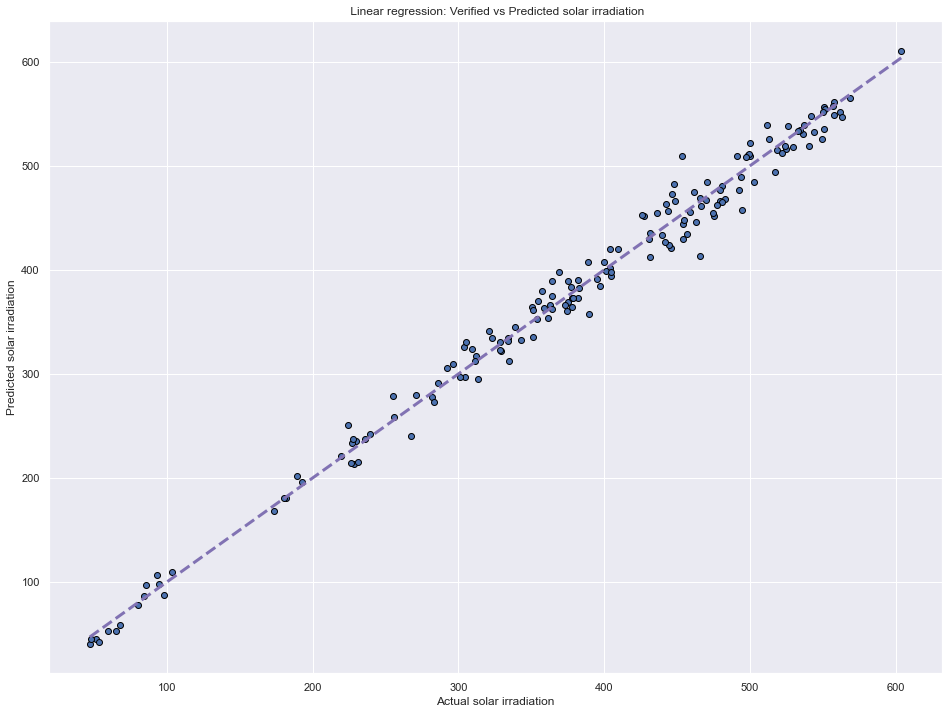

In [6]:
#Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Linear regression: Verified vs Predicted solar irradiation")
plt.savefig("../model/model_figure/lr_line_of_fit.jpg")
plt.show()

d:\Omdena\solar-app\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


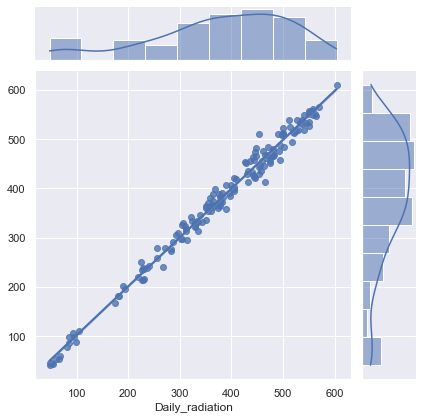

In [7]:
sns.jointplot(y_test, y_pred_lr, kind = 'reg')
plt.savefig("../model/model_figure/lr_jointplot.jpg")
plt.show()

### Random Forest Regressor

In [8]:
# Setup the pipeline steps for random forest: steps
steps = [('scaler', StandardScaler()), ('rfr', RandomForestRegressor())]
# Create the pipeline: pipeline
pipeline_rfr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_rfr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_rfr = pipeline_rfr.predict(X_test)

In [9]:
# Evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared=False)

mae_rf = mean_absolute_error(y_test, y_pred_rfr)

print('r2_score', r2_score(y_test, y_pred_rfr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_rf))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_rf))

r2_score 0.9888675855622683
Root Mean Squared Error: 3.78
Root Mean Absolute Error: 3.15


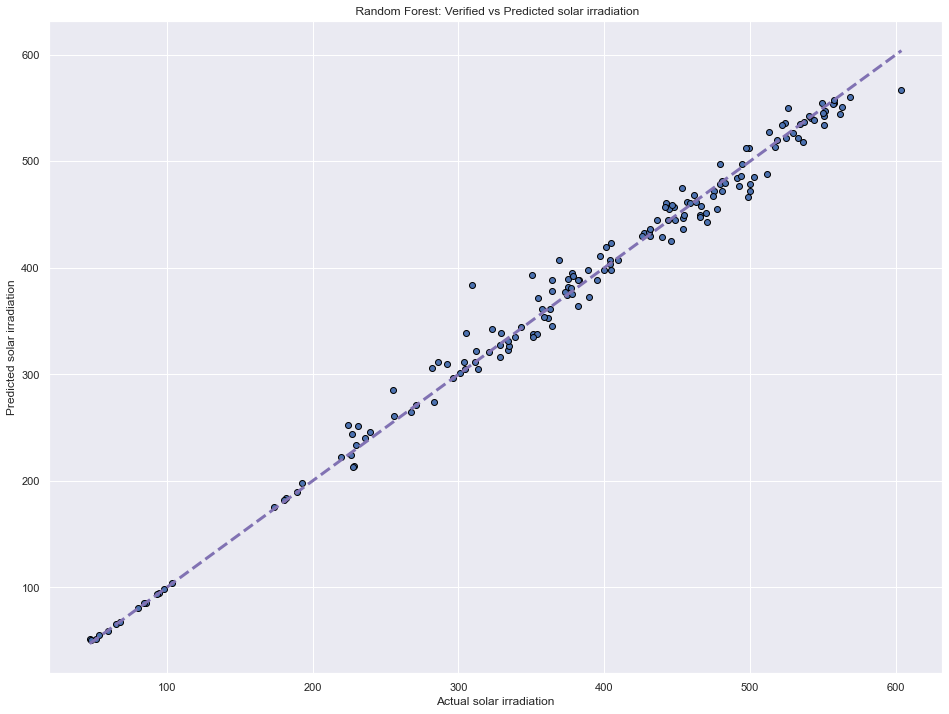

In [10]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Random Forest: Verified vs Predicted solar irradiation")
plt.savefig("../model/model_figure/rfr_line_of_fit.jpg")
plt.show()

d:\Omdena\solar-app\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


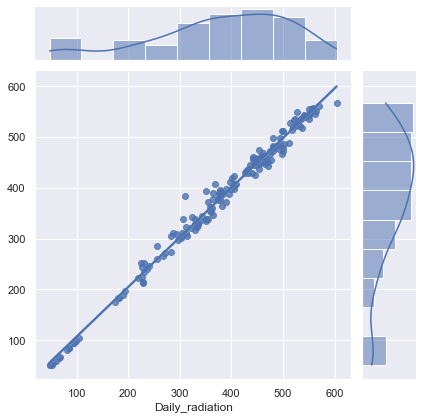

In [11]:
sns.jointplot(y_test, y_pred_rfr, kind = 'reg')
plt.savefig("../model/model_figure/rfr_jointplot.jpg")
plt.show()

### GradientBoosting Regressor

In [12]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('gbr', GradientBoostingRegressor())]
# Create the pipeline: pipeline
pipeline_gbr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_gbr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_gbr = pipeline_gbr.predict(X_test)

In [13]:
# Evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared = False)

mae_gr = mean_absolute_error(y_test, y_pred_gbr)

print('r2_score', r2_score(y_test, y_pred_gbr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_gr))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_gr))

r2_score 0.9923167807551869
Root Mean Squared Error: 3.44
Root Mean Absolute Error: 2.93


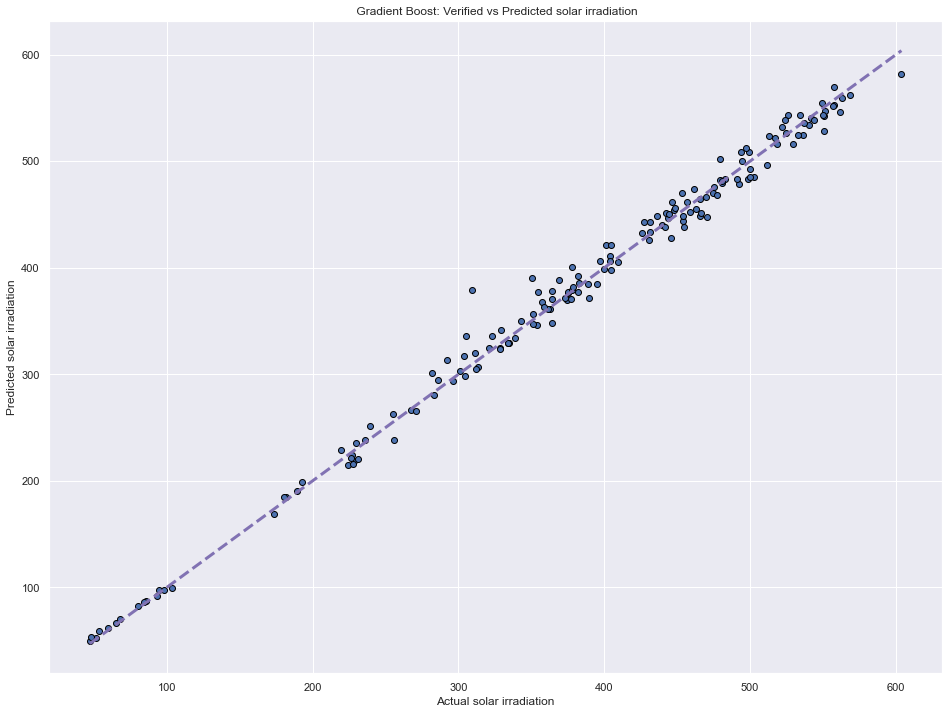

In [14]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Gradient Boost: Verified vs Predicted solar irradiation")
plt.savefig("../model/model_figure/gbr_line_of_fit.jpg")
plt.show()

d:\Omdena\solar-app\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


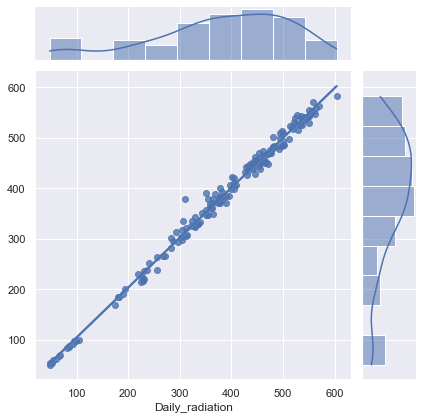

In [15]:
sns.jointplot(y_test, y_pred_gbr, kind = 'reg')
plt.savefig("../model/model_figure/gbr_jointplot.jpg")
plt.show()

### Model Validation

In [16]:
# validation data
val_df = pd.read_csv('../datasets/cleaned/validation.csv')
X_val = val_df.drop(['Daily_radiation'], axis = 1)
y_val = val_df['Daily_radiation']

In [17]:
y_val_lr = pipeline_lr.predict(X_val)
y_val_rfr = pipeline_rfr.predict(X_val)
y_val_gbr = pipeline_gbr.predict(X_val)

In [18]:
# Evaluating algorithm performance for linear regression
mse_lr_val = mean_squared_error(y_val, y_val_lr, squared = False)

mae_lr_val = mean_absolute_error(y_val, y_val_lr)

print('r2_score', r2_score(y_val, y_val_lr))

print('Linear Regression - Root Mean Squared Error: %.2f' % np.sqrt(mse_lr_val))

print('Linear Regression - Root Mean Absolute Error: %.2f' % np.sqrt(mse_lr_val))

r2_score 0.9905014144957088
Linear Regression - Root Mean Squared Error: 3.73
Linear Regression - Root Mean Absolute Error: 3.73


In [19]:
# Evaluating algorithm performance for random forest regression
mse_rf_val = mean_squared_error(y_val, y_val_rfr, squared = False)

mae_rf_val = mean_absolute_error(y_val, y_val_rfr)

print('r2_score', r2_score(y_val, y_val_rfr))

print('Random Forest - Root Mean Squared Error: %.2f' % np.sqrt(mse_rf_val))

print('Random Forest - Root Mean Absolute Error: %.2f' % np.sqrt(mse_rf_val))

r2_score 0.9895896151785958
Random Forest - Root Mean Squared Error: 3.81
Random Forest - Root Mean Absolute Error: 3.81


In [20]:
# Evaluating algorithm performance for gradient boost regression
mse_gbr_val = mean_squared_error(y_val, y_val_gbr, squared = False)

mae_gbr_val = mean_absolute_error(y_val, y_val_gbr)

print('r2_score', r2_score(y_val, y_val_gbr))

print('Gradient Boost - Root Mean Squared Error: %.2f' % np.sqrt(mse_gbr_val))

print('Gradient Boost - Root Mean Absolute Error: %.2f' % np.sqrt(mae_gbr_val))

r2_score 0.9916846701154963
Gradient Boost - Root Mean Squared Error: 3.60
Gradient Boost - Root Mean Absolute Error: 3.09


In [21]:
## Export model and hook it with api

## Experiment tracking with neptune

In [22]:
# Terminal
# pip install neptune-notebooks
# jupyter nbextension enable --py neptune-notebooks
# pip install neptune-client
# pip install neptune-sklearn

In [23]:
# import neptune libraries and sklearn integration
from getpass import getpass
import neptune.new as neptune
import neptune.new.integrations.sklearn as npt_utils

token = getpass('Enter Your Neptune API Token: ')

run = neptune.init(api_token = token,
    project = "ztrimus/solar-app",
    name = 'solar-irradiation',
    source_files = ["4_experiment_tracking.ipynb"])

https://app.neptune.ai/ztrimus/solar-app/e/SOL-7


Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs.neptune.ai/you-should-know/what-can-you-log-and-display#hardware-consumption


Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [24]:
# Track files, models, and folders
run["cleaned_datasets"].track_files("../datasets/cleaned")
run["raw_datasets"].track_files("../datasets/raw")
run["notebooks"].track_files("../notebooks/")

Did not log feature importance chart. Error: could not find feature importances param on Pipeline


d:\Omdena\solar-app\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
d:\Omdena\solar-app\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Did not log feature importance chart. Error: could not find feature importances param on Pipeline


d:\Omdena\solar-app\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
d:\Omdena\solar-app\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Did not log feature importance chart. Error: could not find feature importances param on Pipeline


d:\Omdena\solar-app\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
d:\Omdena\solar-app\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


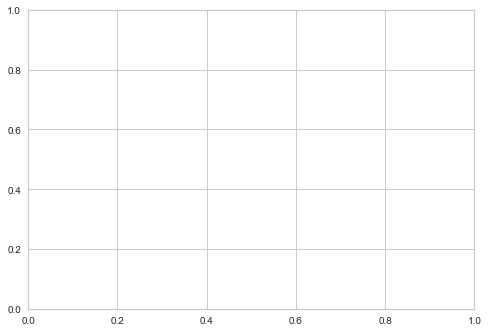

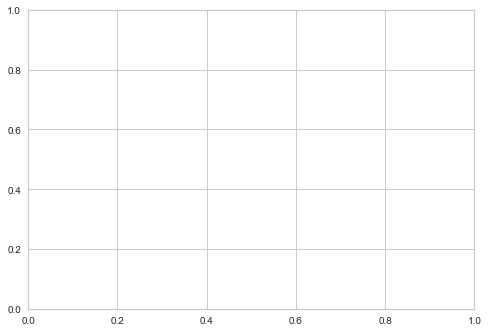

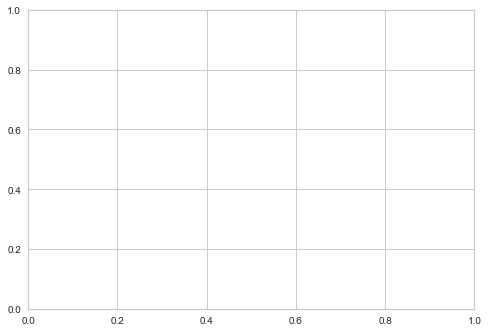

In [25]:
# train, and test; while tracking the experiment
run['lr_summary'] = npt_utils.create_regressor_summary(pipeline_lr, X_train, X_test, y_train, y_test)
run['gbr_summary'] = npt_utils.create_regressor_summary(pipeline_gbr, X_train, X_test, y_train, y_test)
run['rfr_summary'] = npt_utils.create_regressor_summary(pipeline_rfr, X_train, X_test, y_train, y_test)

In [26]:
# stop experiment
run.stop()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 87 operations to synchronize with Neptune. Do not kill this process.


All 87 operations synced, thanks for waiting!


## Experiment tracking with mlflow

In [27]:
# import libraries
import mlflow
import mlflow.sklearn

In [28]:
# model metrics for linear regression
rmse_lr_pred = np.sqrt(mean_squared_error(y_test, y_pred_lr, squared = False))
rmae_lr_pred = np.sqrt(mean_absolute_error(y_test, y_pred_lr))
R2_score_lr = r2_score(y_test, y_pred_lr)

# model metrics for random forest
rmse_rfr_pred = np.sqrt(mean_squared_error(y_test, y_pred_rfr, squared = False))
rmae_rfr_pred = np.sqrt(mean_absolute_error(y_test, y_pred_rfr))
R2_score_rfr = r2_score(y_test, y_pred_rfr)

# model metrics for gradient boost
rmse_gbr_pred = np.sqrt(mean_squared_error(y_test, y_pred_gbr, squared = False))
rmae_gbr_pred = np.sqrt(mean_absolute_error(y_test, y_pred_gbr))
R2_score_gbr = r2_score(y_test, y_pred_gbr)

#### manually log experiment

In [29]:
# set the tracking uri
# $ mlflow server \ --backend-store-uri sqlite:///mlflow.db \ --default-artifact-root ./artifacts \ --host 0.0.0.0

# in notebook folder path
# $ mlflow ui
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
experiment = mlflow.get_experiment('0')

In [30]:
print("Name of experiment: {}".format(experiment.name))
print("Location of Artifact: {}".format(experiment.artifact_location))
print("Life cycle phase: {}".format(experiment.lifecycle_stage))
print("Experiment_ID: {}".format(experiment.experiment_id))

Name of experiment: Default
Location of Artifact: ./artifacts/0
Life cycle phase: active
Experiment_ID: 0


In [31]:
# start experiment tracking
run = mlflow.start_run(run_name = 'solar_irradiation')
run_id = run.info.run_id
print(f"run_id: {run_id}")

run_id: 92851d12006849dfbb1979979d9bdb65


In [32]:
# Log mlflow attributes for mlflow UI
# log metrics for linear regression
mlflow.log_metric("rmse_lr", rmse_lr_pred)
mlflow.log_metric("rmae_lr", rmae_lr_pred)
mlflow.log_metric("r2_score_lr", R2_score_lr)

# log metrics for random forest
mlflow.log_metric("rmse_rfr", rmse_rfr_pred)
mlflow.log_metric("rmae_rfr", rmae_rfr_pred)
mlflow.log_metric("r2_score_rfr", R2_score_rfr)

# log metrics for gradientboost
mlflow.log_metric("rmse_gbr", rmse_gbr_pred)
mlflow.log_metric("rmae_gbr", rmae_gbr_pred)
mlflow.log_metric("r2_score_gbr", R2_score_gbr)

In [33]:
# log models experiments
artifact_path = "default"
mlflow.sklearn.log_model(pipeline_lr, artifact_path = artifact_path, registered_model_name = "linear-regression-model")
mlflow.sklearn.log_model(pipeline_rfr, artifact_path = artifact_path, registered_model_name = "sklearn-random-forest-model")
mlflow.sklearn.log_model(pipeline_gbr, artifact_path = artifact_path, registered_model_name = "sklearn-gradientboost-model")

Successfully registered model 'linear-regression-model'.
2022/01/22 12:04:30 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: linear-regression-model, version 1
Created version '1' of model 'linear-regression-model'.
Successfully registered model 'sklearn-random-forest-model'.
2022/01/22 12:04:34 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: sklearn-random-forest-model, version 1
Created version '1' of model 'sklearn-random-forest-model'.
Successfully registered model 'sklearn-gradientboost-model'.
2022/01/22 12:04:40 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: sklearn-gradientboost-model, version 1
Created version '1' of model 'sklearn-gradientboost-model'.


ModelInfo(artifact_path='default', flavors={'python_function': {'model_path': 'model.pkl', 'loader_module': 'mlflow.sklearn', 'python_version': '3.7.4', 'env': 'conda.yaml'}, 'sklearn': {'pickled_model': 'model.pkl', 'sklearn_version': '1.0.2', 'serialization_format': 'cloudpickle'}}, model_uri='runs:/92851d12006849dfbb1979979d9bdb65/default', model_uuid='b92dfeeba00645238b42b6f4c3b92d43', run_id='92851d12006849dfbb1979979d9bdb65', saved_input_example_info=None, signature_dict=None, utc_time_created='2022-01-22 06:34:34.639295')

In [34]:
# Log artifacts (output files)
mlflow.log_artifact("../model/model_figure/lr_line_of_fit.jpg", artifact_path = 'features')

# Log Features
mlflow.log_artifact('../datasets/cleaned/train.csv', artifact_path = 'features')

In [35]:
# End tracking
mlflow.end_run()

#### Auto log experiment

In [36]:
# enable auto logging
mlflow.sklearn.autolog(log_models = True)

In [37]:
with mlflow.start_run(experiment_id = experiment.experiment_id, run_name = 'auto_all_model') as run:
    pipeline_lr.fit(X_train, y_train)
    y_pred_lr = pipeline_lr.predict(X_test)
    pipeline_rfr.fit(X_train, y_train)
    y_pred_rfr = pipeline_rfr.predict(X_test)
    pipeline_gbr.fit(X_train, y_train)
    y_pred_gbr = pipeline_gbr.predict(X_test)

2022/01/22 12:05:01 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Omdena\solar-app\venv\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2022/01/22 12:05:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Omdena\solar-app\venv\lib\site-packages\mlflow\

In [38]:
# End tracking
mlflow.end_run()

### Export models

In [39]:
# check sklearn version
from sklearn import __version__

print(__version__)

# pip install scikit-learn==0.24.1

1.0.2


In [40]:
# loading libraries
import joblib

# Save Models to file in the model directory
# save linear regression model
joblib_lr = "../model/model_lr.pkl"  
joblib.dump(pipeline_lr, joblib_lr)
# save random forest model
joblib_rfr = "../model/model_rfr.pkl" 
joblib.dump(pipeline_lr, joblib_rfr)
# save gradientboost model
joblib_gbr = "../model/model_gbr.pkl"  
joblib.dump(pipeline_lr, joblib_gbr)

['../model/model_gbr.pkl']

### Recommended reading

1. https://docs.neptune.ai/integrations-and-supported-tools/model-training/sklearn

2. https://mlflow.org/docs/latest/tracking.html#scenario-1-mlflow-on-localhost

3. https://docs.neptune.ai/getting-started/examples#data-versioning 